## Advanced Computer Vision and Deep Learning 

#### Assignment 1

Richard Yang

## Question 2
Train two different models using sklearn to learn each of the following gates: Logistic Regression, Support Vector Machine (SVC)

Note: To learn the above gates you will need 100% accuracy on the training data. If a gate cannot be
learned by the model mention the reason why. (20)



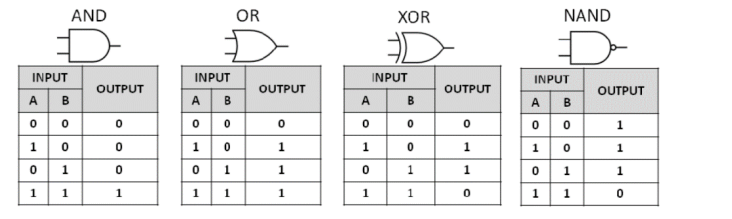

In [9]:
from IPython.display import Image
Image(filename="pic3.png")

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the input data and labels for each gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])
y_nand = np.array([1, 1, 1, 0])




#### Logistic Regression:

In [2]:
# AND gate
clf_and = LogisticRegression().fit(X, y_and)
accuracy_and = clf_and.score(X, y_and)

# OR gate
clf_or = LogisticRegression().fit(X, y_or)
accuracy_or = clf_or.score(X, y_or)

# XOR gate
clf_xor = LogisticRegression().fit(X, y_xor)
accuracy_xor = clf_xor.score(X, y_xor)

# NAND gate
clf_nand = LogisticRegression().fit(X, y_nand)
accuracy_nand = clf_nand.score(X, y_nand)

print(f"Logistic Regression:")
print(f"AND gate accuracy: {accuracy_and * 100}%")
print(f"OR gate accuracy: {accuracy_or * 100}%")
print(f"XOR gate accuracy: {accuracy_xor * 100}%")
print(f"NAND gate accuracy: {accuracy_nand * 100}%")


Logistic Regression:
AND gate accuracy: 75.0%
OR gate accuracy: 75.0%
XOR gate accuracy: 50.0%
NAND gate accuracy: 75.0%


#### SVM

In [2]:
# Create a single SVM model
clf_svc = SVC()

# AND gate
clf_svc.fit(X, y_and)
accuracy_and_svc = clf_svc.score(X, y_and)

# OR gate
clf_svc.fit(X, y_or)
accuracy_or_svc = clf_svc.score(X, y_or)

# XOR gate
clf_svc.fit(X, y_xor)
accuracy_xor_svc = clf_svc.score(X, y_xor)

# NAND gate
clf_svc.fit(X, y_nand)
accuracy_nand_svc = clf_svc.score(X, y_nand)

print(f"\nSupport Vector Machine:")
print(f"AND gate accuracy: {accuracy_and_svc * 100}%")
print(f"OR gate accuracy: {accuracy_or_svc * 100}%")
print(f"XOR gate accuracy: {accuracy_xor_svc * 100}%")
print(f"NAND gate accuracy: {accuracy_nand_svc * 100}%")


Support Vector Machine:
AND gate accuracy: 100.0%
OR gate accuracy: 100.0%
XOR gate accuracy: 100.0%
NAND gate accuracy: 100.0%


The XOR gate cannot be learned using Logistic Regression because it is not linearly separable, meaning there is no straight line that can separate the two classes. 

Support Vector Machines (SVC) achieved 100% accuracy on all logic gates, showcasing its ability to capture both linear and non-linear relationships. On the other hand, Logistic Regression, being inherently linear, showed limitations, especially with the XOR gate's non-linear decision boundary, resulting in a 50% accuracy. This difference highlights SVC's versatility through kernel tricks and the linearity constraints of Logistic Regression.

## Question 3

Use randomly generated data to demonstrate how the ROC curve differs from (Precision-Recall) PR curve for unbalanced datasets. Plot both curves on different levels of imbalance between the two classes (e.g. 50/50, 75/25, 90/10). Summarize your observations. (20)


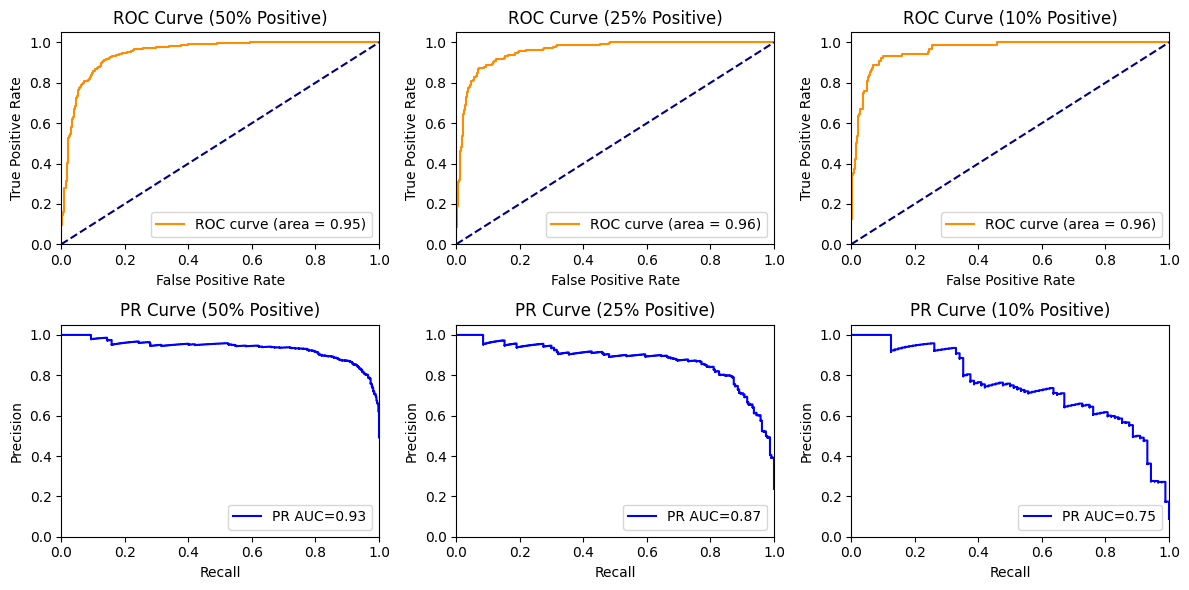

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

ratios = [0.5, 0.25, 0.1]  # Directly use imbalance ratios

plt.figure(figsize=(12, 6))

for idx, imbalance in enumerate(ratios, 1):
    # Generate data
    X, y = make_classification(n_samples=2000, n_features=20,
                               weights=[1-imbalance],  # Only using one weight for the majority class
                               random_state=42)
    
    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.subplot(2, 3, idx)
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({int(imbalance*100)}% Positive)')
    plt.legend(loc="lower right")
    
    # PR Curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)  # Using the area under PR curve

    plt.subplot(2, 3, idx + 3)
    plt.step(recall, precision, color='b', where='post', label=f'PR AUC={pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'PR Curve ({int(imbalance*100)}% Positive)')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


**ROC Curves**:

- ROC curves, across different codes and setups, have demonstrated a relative insensitivity to class imbalances. While there's a decline in AUC values as imbalances intensify, the change is modest and may often give a misleadingly optimistic assessment of a model's performance.

**PR Curves**:

- In stark contrast to the ROC curves, PR curves are noticeably sensitive to imbalances. They offer a deeper insight, especially when the positive class is underrepresented. As the imbalance grows, PR curves experience a marked downward shift and the associated AUC values drop significantly. This highlights the increased trade-off between precision and recall in such scenarios.

**Comparative Insights**:

- While ROC curves provide a holistic view of model performance across both positive and negative outcomes, PR curves concentrate explicitly on the positive class. This makes the PR curve especially pertinent for datasets with a minority positive class, presenting a realistic view of the model's efficacy.
Given their nature, ROC curves might remain relatively stable across different imbalance levels, whereas PR curves capture the nuances and challenges of skewed datasets more distinctly. Hence, for imbalanced scenarios, relying on the PR curve often gives a more comprehensive understanding of a model's true performance.


## Question 4

- Design an optimal solution and submit a screenshot with the neural network architecture and hyperparameters for the below classification problem (20). Summarize your design in a few statements.


- Architecture: A single hidden layer followed by an output layer.
- Input Features: 6
- Hidden Layer:
  - Number of Neurons: 8
  - Activation Function: ReLU (Rectified Linear Unit)
- Output Layer:
  - Activation Function: Sigmoid

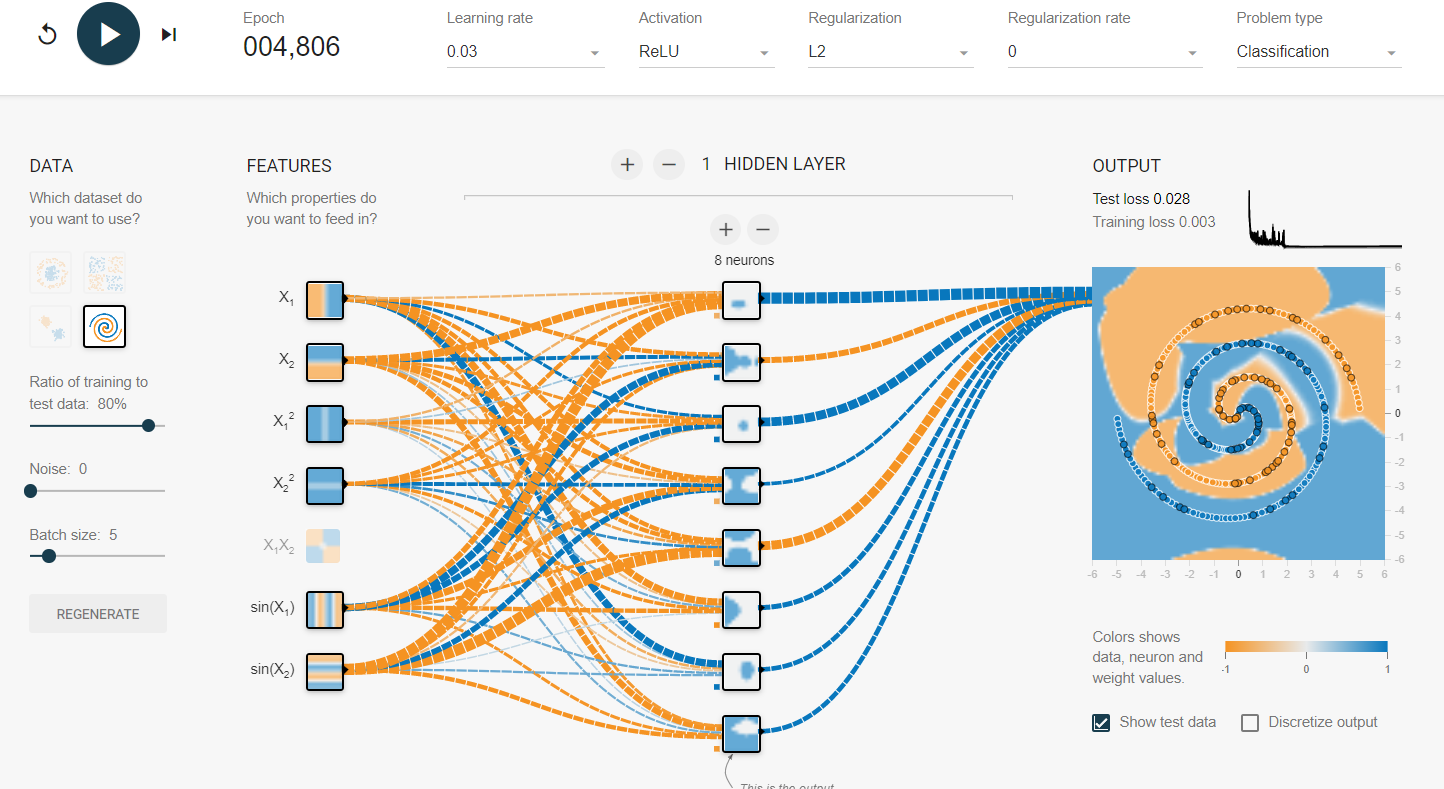

In [10]:
from IPython.display import Image
Image(filename="pic1.png")

In [5]:
# Import TensorFlow
import tensorflow as tf

# Define the input shape
inputs = tf.keras.Input(shape=(6,))

# Add a Dense layer with 8 neurons and a ReLU activation function
x = tf.keras.layers.Dense(8, activation='relu')(inputs)

# Define the output layer with a sigmoid activation function
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Compile the model
simple_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the number of trainable parameters
print('Number of trainable parameters in the simple model:', simple_model.count_params())


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Number of trainable parameters in the simple model: 65


Now let's try a deeper model

- Architecture: Two hidden layers followed by an output layer.
- Input Features: 6
- First Hidden Layer:
  - Number of Neurons: 5
  - Activation Function: ReLU 
- Second Hidden Layer:
  - Number of Neurons: 2
  - Activation Function: ReLU
- Output Layer:
  - Activation Function: Sigmoid

In [6]:
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(5, activation='relu')(inputs)
x = tf.keras.layers.Dense(2, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
deeper_model = tf.keras.Model(inputs=inputs, outputs=outputs)
print('Number of trainable parameters in the simple model:', deeper_model.count_params())


Number of trainable parameters in the simple model: 50


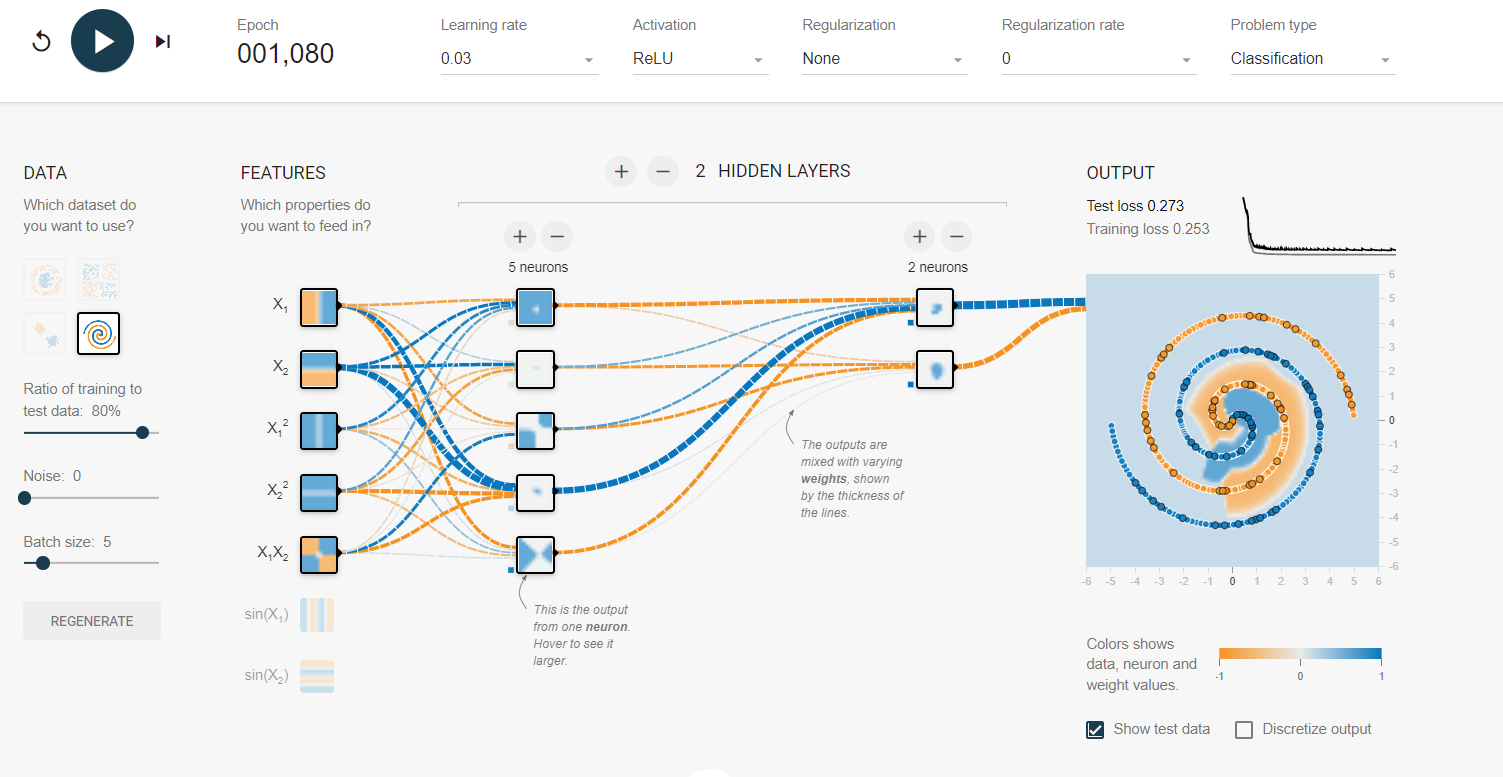

In [11]:
from IPython.display import Image
Image(filename="pic2.png")

The deeper model offers a hierarchical representation with its two hidden layers. The first layer comprises 5 neurons, while the second layer narrows down to 2 neurons, both using the ReLU activation. This model aims to capture more complex patterns in the data. The use of two layers might help in better segregating the data. Similar to the simple model, it ends with a sigmoid-activated neuron for binary classification.

Given the classification problem at hand, two models have been proposed. The choice between the simple and deeper model depends on the specific nature of the data. If the data can be separated with simpler boundaries, the simple model might suffice. On the other hand, if the data requires more intricate boundaries, the deeper model is more appropriate. Notably, the deeper model achieves a more parameter-efficient representation with only 50 trainable parameters compared to the 65 in the simple model. This might make the deeper model more favorable when considering computational costs.

Finally, testing on a validation set and comparing their performances would provide further clarity on which architecture is more suited for this specific classification problem.